<a href="https://colab.research.google.com/github/phamoh/SCIP-Rproject2/blob/main/Project2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCIP Project 2

# Let's get started!


Today's project is inspired by the graphics in this article in the LA Time about COVID-19 vaccinations in California. I also included a pdf version of the article from May 10th in case the link no longer works (You can find it in the GitHub Repo).
Link: https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/covid-19-vaccines-distribution/#county-comparison

Note: This dataset was downloaded on May 10, 2021 so some of the data will be different than the news by the time you do your project. If you would like to download the latest dataset, you can visit https://data.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data and download the "Statewide COVID-19 Vaccines Administered By County" csv file.

If you want to learn more about the data, in this folder is also an xlsx file that gives you more of an in-depth description of the data collected. The file is called "covid-19-progress-dashboard-data-dictionary.xlsx"




In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from datetime import datetime
from plotnine import *

Read the dataset "covid-19-progress-county-051021.csv" from GitHib

The full repo is here https://github.com/phamoh/SCIP-Rproject2

In [ ]:
url = "https://raw.githubusercontent.com/phamoh/SCIP-Rproject2/main/covid-19-progress-county-051021.csv" 
data = pd.read_csv(url)

In [ ]:
data

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,All CA Counties,2020-12-15,1134,1134,1134,1134,0,0,0,0,1134,1134,0,0,1134,1134,NaN
1,All CA Counties,2020-12-16,8119,9253,8119,9253,0,0,0,0,8119,9253,0,0,8119,9253,NaN
2,All CA Counties,2020-12-17,25719,34972,25719,34972,0,0,0,0,25721,34974,0,0,25721,34974,NaN
3,All CA Counties,2020-12-18,43750,78722,43696,78668,54,54,0,0,43751,78725,0,0,43751,78725,NaN
4,All CA Counties,2020-12-19,25203,103925,25180,103848,23,77,0,0,25202,103926,1,1,25202,103927,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8678,Yuba,2021-05-04,285,34112,93,10333,171,21494,21,2285,127,5638,158,15344,148,20982,California
8679,Yuba,2021-05-05,304,34416,76,10409,221,21715,7,2292,105,5551,199,15543,112,21094,California
8680,Yuba,2021-05-06,226,34642,98,10507,90,21805,38,2330,75,5516,148,15691,113,21207,California
8681,Yuba,2021-05-07,287,34929,56,10563,210,22015,21,2351,91,5431,196,15887,111,21318,California


# Cleaning data

## Removing whitespace

Sometimes data can be very messy. Data entry can include extra white spaces that can mess up your analysis.

So before you begin your analysis with datasets involving text, you should remove any extra white spaces.

There are a various ways you can do this. Here are some:

*   Method 1: Use strip() function
*   Method 2: Use join() and split()

Let's start simple, you can remove the white spaces which are found at the beginning or end of a string by using the `strip()` function.

In [ ]:
# Creating a string of text that has an extra white space
text1 = "I am writing a sentence with an extra space at the end "
text1

'I am writing a sentence with an extra space at the end '

In [ ]:
text1.strip()

'I am writing a sentence with an extra space at the end'

What if we want to remove duplicated whitespaces in a sentence? We can use `join()` function with string `split()` function. This will remove whitespaces throughout the string by spliting the string into a list and then joining with a single whitespace " ".


In [ ]:
text2 = "I am writing a    sentence with an extra spaces everywhere "
text2

' I am writing a    sentence with an extra spaces everywhere '

In [ ]:
" ".join(text2.split())

'I am writing a sentence with an extra spaces everywhere'

Now lets use clean up the county column in our vaccine dataset. 

Note: What is different here than the previos chunk is that you also need to include str.

Tip: You need to remember to assign it to a variable to see the results. Here we are re-assigning it to the county column.


In [ ]:
data['county'] = data['county'].str.strip()


## Formatting dates

A date in Python is not a data type of its own so we have to use libraries named datetime or pandas to work with dates as date objects.

In this dataset, we know that the "administered_date" column are dates and a column that we are interested in working with. Since this dataset comes from America, we are used to date formats as MM/DD/YYYY however, dates can be represented in different ways in different countries. For example, in Asia it is YYYY/MMM/DDD. To find out what %Y-%m-%d is and other formats, take a look at the guide.

Guide: https://www.w3schools.com/python/python_datetime.asp


In [ ]:
# Let's practice on date format using the library datetime
date_str = '15/Jan/2020'

datetime.strptime(date_str, '%d/%b/%Y')


datetime.datetime(2020, 1, 15, 0, 0)

In [ ]:
# Let's practice on date format using the library pandas
date_str = '15/Jan/2020'

pd.to_datetime(date_str, format='%d/%b/%Y')

Timestamp('2020-01-15 00:00:00')

## Question

What would the legal format codes be for these dates?

1. 01/Jan/2020
2. 01/15/20
3. January-15-2020



Now let's begin transforming the 'administered_date' column to a date object.

In [ ]:
data.dtypes

county                          object
administered_date               object
total_doses                      int64
cumulative_total_doses           int64
pfizer_doses                     int64
cumulative_pfizer_doses          int64
moderna_doses                    int64
cumulative_moderna_doses         int64
jj_doses                         int64
cumulative_jj_doses              int64
partially_vaccinated             int64
total_partially_vaccinated       int64
fully_vaccinated                 int64
cumulative_fully_vaccinated      int64
at_least_one_dose                int64
cumulative_at_least_one_dose     int64
california_flag                 object
dtype: object

In [ ]:
data['administered_date'] = pd.to_datetime(data['administered_date'], format='%Y-%m-%d')
data.dtypes

county                                  object
administered_date               datetime64[ns]
total_doses                              int64
cumulative_total_doses                   int64
pfizer_doses                             int64
cumulative_pfizer_doses                  int64
moderna_doses                            int64
cumulative_moderna_doses                 int64
jj_doses                                 int64
cumulative_jj_doses                      int64
partially_vaccinated                     int64
total_partially_vaccinated               int64
fully_vaccinated                         int64
cumulative_fully_vaccinated              int64
at_least_one_dose                        int64
cumulative_at_least_one_dose             int64
california_flag                         object
dtype: object

# Calculating the percentage of those vaccinated (for plot 1)

For this section, we will take a subset of the data. We will focus on the rows that have data for "All CA Counties".


In [ ]:
CA_data = data[data.county.isin(["All CA Counties"])]
CA_data

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,All CA Counties,2020-12-15,1134,1134,1134,1134,0,0,0,0,1134,1134,0,0,1134,1134,NaN
1,All CA Counties,2020-12-16,8119,9253,8119,9253,0,0,0,0,8119,9253,0,0,8119,9253,NaN
2,All CA Counties,2020-12-17,25719,34972,25719,34972,0,0,0,0,25721,34974,0,0,25721,34974,NaN
3,All CA Counties,2020-12-18,43750,78722,43696,78668,54,54,0,0,43751,78725,0,0,43751,78725,NaN
4,All CA Counties,2020-12-19,25203,103925,25180,103848,23,77,0,0,25202,103926,1,1,25202,103927,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,All CA Counties,2021-05-04,319911,30899794,195409,16310852,115085,13478515,9417,1110427,94111,5672053,224856,13266319,104675,18938372,NaN
141,All CA Counties,2021-05-05,301909,31201703,192942,16503794,99333,13577848,9634,1120061,84948,5551663,215939,13482258,95549,19033921,NaN
142,All CA Counties,2021-05-06,306260,31507963,203094,16706888,93332,13671180,9834,1129895,77687,5413349,227515,13709773,89201,19123122,NaN
143,All CA Counties,2021-05-07,226575,31734538,144589,16851477,76911,13748091,5075,1134970,58503,5310513,167289,13877062,64453,19187575,NaN


In the article "Tracking coronavirus vaccinations in California", the LA Times does not give us the population count of California used to calculate percentage. So here, we'll be using the number of 39,466,917 based on some web searches. Feel free to change this number based on other sources!


In [ ]:
CA_pop = 39466917


Here, we are calculating the percentage of those who have had at least one dose (this is for those who are partially vaccinated).



In [ ]:
CA_data['partial_percent'] = CA_data['cumulative_at_least_one_dose'].div(CA_pop).mul(100)
CA_data['partial_percent'] = round(CA_data['partial_percent'], 2)
CA_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,partial_percent
0,All CA Counties,2020-12-15,1134,1134,1134,1134,0,0,0,0,1134,1134,0,0,1134,1134,NaN,0.00
1,All CA Counties,2020-12-16,8119,9253,8119,9253,0,0,0,0,8119,9253,0,0,8119,9253,NaN,0.02
2,All CA Counties,2020-12-17,25719,34972,25719,34972,0,0,0,0,25721,34974,0,0,25721,34974,NaN,0.09
3,All CA Counties,2020-12-18,43750,78722,43696,78668,54,54,0,0,43751,78725,0,0,43751,78725,NaN,0.20
4,All CA Counties,2020-12-19,25203,103925,25180,103848,23,77,0,0,25202,103926,1,1,25202,103927,NaN,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,All CA Counties,2021-05-04,319911,30899794,195409,16310852,115085,13478515,9417,1110427,94111,5672053,224856,13266319,104675,18938372,NaN,47.99
141,All CA Counties,2021-05-05,301909,31201703,192942,16503794,99333,13577848,9634,1120061,84948,5551663,215939,13482258,95549,19033921,NaN,48.23
142,All CA Counties,2021-05-06,306260,31507963,203094,16706888,93332,13671180,9834,1129895,77687,5413349,227515,13709773,89201,19123122,NaN,48.45
143,All CA Counties,2021-05-07,226575,31734538,144589,16851477,76911,13748091,5075,1134970,58503,5310513,167289,13877062,64453,19187575,NaN,48.62


Here, we are calculating the percentage of those who are fully vaccinated.



In [ ]:
CA_data['fully_percent'] = CA_data['cumulative_fully_vaccinated'].div(CA_pop).mul(100)
CA_data['fully_percent'] = round(CA_data['fully_percent'], 2)
CA_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,partial_percent,fully_percent
0,All CA Counties,2020-12-15,1134,1134,1134,1134,0,0,0,0,1134,1134,0,0,1134,1134,NaN,0.00,0.00
1,All CA Counties,2020-12-16,8119,9253,8119,9253,0,0,0,0,8119,9253,0,0,8119,9253,NaN,0.02,0.00
2,All CA Counties,2020-12-17,25719,34972,25719,34972,0,0,0,0,25721,34974,0,0,25721,34974,NaN,0.09,0.00
3,All CA Counties,2020-12-18,43750,78722,43696,78668,54,54,0,0,43751,78725,0,0,43751,78725,NaN,0.20,0.00
4,All CA Counties,2020-12-19,25203,103925,25180,103848,23,77,0,0,25202,103926,1,1,25202,103927,NaN,0.26,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,All CA Counties,2021-05-04,319911,30899794,195409,16310852,115085,13478515,9417,1110427,94111,5672053,224856,13266319,104675,18938372,NaN,47.99,33.61
141,All CA Counties,2021-05-05,301909,31201703,192942,16503794,99333,13577848,9634,1120061,84948,5551663,215939,13482258,95549,19033921,NaN,48.23,34.16
142,All CA Counties,2021-05-06,306260,31507963,203094,16706888,93332,13671180,9834,1129895,77687,5413349,227515,13709773,89201,19123122,NaN,48.45,34.74
143,All CA Counties,2021-05-07,226575,31734538,144589,16851477,76911,13748091,5075,1134970,58503,5310513,167289,13877062,64453,19187575,NaN,48.62,35.16


## Question
Take a look at the new percentages columns in the dataset (particularly the last one). Compare it to the percentages in the pdf (49.1% of residents have received at least one dose and 35.7% are fully vaccinated). Our percentages are close, but why do you think the calculations might differ from each other?


# Calculating the rolling means for the doses administered (for plot 2)

In the article, you'll notice that they don't just plot the numbers of doses administed, but they include a summary lines of the rolling averages over 7 days.

A rolling mean is an average for a window of data, where the window is a series of sequential values from the data. we will be using the `rolling()` function from pandas to do the following calculations. We're going to use the default setting and use `min_periods=1`. After creating our second plot, you can change the setting if you want it to match more closely to the LA Times plot.

Documentation for the `rolling()` function https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [ ]:
CA_data['wk_avg'] = CA_data['total_doses'].rolling(7, min_periods=1).mean()
CA_data['wk_avg'] = round(CA_data['wk_avg'], 0)
CA_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,partial_percent,fully_percent,wk_avg
0,All CA Counties,2020-12-15,1134,1134,1134,1134,0,0,0,0,1134,1134,0,0,1134,1134,NaN,0.00,0.00,1134.0
1,All CA Counties,2020-12-16,8119,9253,8119,9253,0,0,0,0,8119,9253,0,0,8119,9253,NaN,0.02,0.00,4626.0
2,All CA Counties,2020-12-17,25719,34972,25719,34972,0,0,0,0,25721,34974,0,0,25721,34974,NaN,0.09,0.00,11657.0
3,All CA Counties,2020-12-18,43750,78722,43696,78668,54,54,0,0,43751,78725,0,0,43751,78725,NaN,0.20,0.00,19680.0
4,All CA Counties,2020-12-19,25203,103925,25180,103848,23,77,0,0,25202,103926,1,1,25202,103927,NaN,0.26,0.00,20785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,All CA Counties,2021-05-04,319911,30899794,195409,16310852,115085,13478515,9417,1110427,94111,5672053,224856,13266319,104675,18938372,NaN,47.99,33.61,282925.0
141,All CA Counties,2021-05-05,301909,31201703,192942,16503794,99333,13577848,9634,1120061,84948,5551663,215939,13482258,95549,19033921,NaN,48.23,34.16,276980.0
142,All CA Counties,2021-05-06,306260,31507963,203094,16706888,93332,13671180,9834,1129895,77687,5413349,227515,13709773,89201,19123122,NaN,48.45,34.74,270595.0
143,All CA Counties,2021-05-07,226575,31734538,144589,16851477,76911,13748091,5075,1134970,58503,5310513,167289,13877062,64453,19187575,NaN,48.62,35.16,251076.0


# Recreating the plots by the LA Times


## Plot 1: Percentages vaccinated

Here we will use the plotnine library which uses R's ggplot library. There are many different libraries you can use!

Something to keep in mind about plotnine/ggplot is it's based on layers. So first you have your data layer, then the aesthetics layer, then the geometries layer, and so on.

Here is a nice guide on Exploratory data analysis and Python plotting libraries. You can click through to compare how certain plots would look depending on the library (Different libraries: pandas, plotnine, plotly, and Altair) https://pythonplot.com/

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


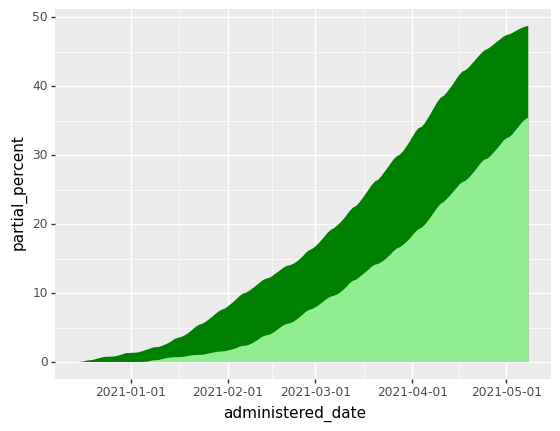

<ggplot: (8774549874505)>

In [ ]:
(ggplot(data = CA_data) +
 aes(x = 'administered_date', y = 'partial_percent') +
 geom_area(fill = 'green') +
 geom_area(aes(x = 'administered_date', y = 'fully_percent'), fill = 'lightgreen')
 )


Our plot looks pretty similar to the one in the article! You can change the colors to find a better match and the axes to make it look nicer.

## Plot 2: Doses administered

Now, we're going to create the second plot in the article. In that plot, they overlay a summary line on the doses administered. We have already calculated the rolling averages over 7 days (wk_avg).



/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


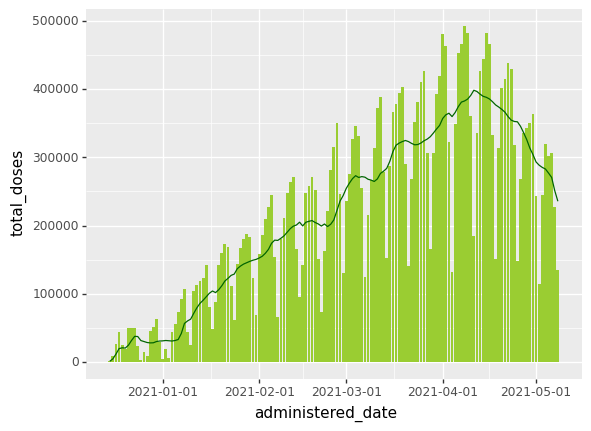

<ggplot: (8774559573065)>

In [ ]:
(ggplot(data = CA_data) +
 aes(x = 'administered_date', y = 'total_doses') +
 geom_col(fill = 'yellowgreen') +
 scale_y_continuous() +
 geom_line(aes(x = 'administered_date', y = 'wk_avg'), color = 'darkgreen')
 )



We just completed re-creating two plots that look pretty similar to the ones in the article!  



# Assignment

Now, it's your turn to create these plots for a county in California. There are 58 different counties to choose from! You could pick a county that you live in or a county you like to visit. 

Remember to 
* For the calculations, remember to use the population of the county of your chose.
* For the plot: Add a title, change the name of the x-axis and y-axis, and choose colors that you like!
